In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
dataset_dir = '/content/sample_data/data'

In [7]:
img_size = 64
categories = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']

def load_images(folder):
    images = []
    labels = []
    for category in categories:
        class_num = categories.index(category)
        category_folder = os.path.join(folder, category)
        for filename in os.listdir(category_folder):
            if filename.endswith('.png'):
                img_path = os.path.join(category_folder, filename)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (img_size, img_size))
                images.append(img)
                labels.append(class_num)
    return np.array(images), np.array(labels)

X, y = load_images(dataset_dir)

In [9]:
X = X / 255.0
lb = LabelBinarizer()
y = lb.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 276ms/step - accuracy: 0.1203 - loss: 2.3035 - val_accuracy: 0.1957 - val_loss: 2.3000
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.1497 - loss: 2.2996 - val_accuracy: 0.1957 - val_loss: 2.2956
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 350ms/step - accuracy: 0.1512 - loss: 2.2955 - val_accuracy: 0.1957 - val_loss: 2.2839
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.1383 - loss: 2.2996 - val_accuracy: 0.1957 - val_loss: 2.2831
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.1541 - loss: 2.2935 - val_accuracy: 0.1957 - val_loss: 2.2795
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.1233 - loss: 2.3119 - val_accuracy: 0.1957 - val_loss: 2.2813
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.1030 - loss: 2.2894 - val_accuracy: 0.1957 - val_loss: 2.2787
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.1520 - loss: 2.3045 - val_accuracy: 0.1957 - val_loss:

In [11]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=categories))

accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
               precision    recall  f1-score   support

      01_palm       0.00      0.00      0.00         5
         02_l       0.00      0.00      0.00         2
      03_fist       0.00      0.00      0.00         2
04_fist_moved       0.00      0.00      0.00         2
     05_thumb       0.00      0.00      0.00         6
     06_index       0.20      1.00      0.33         9
        07_ok       0.00      0.00      0.00         6
08_palm_moved       0.00      0.00      0.00         4
         09_c       0.00      0.00      0.00         5
      10_down       0.00      0.00      0.00         5

     accuracy                           0.20        46
    macro avg       0.02      0.10      0.03        46
 weighted avg       0.04      0.20      0.06        46

Accuracy: 19.57%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


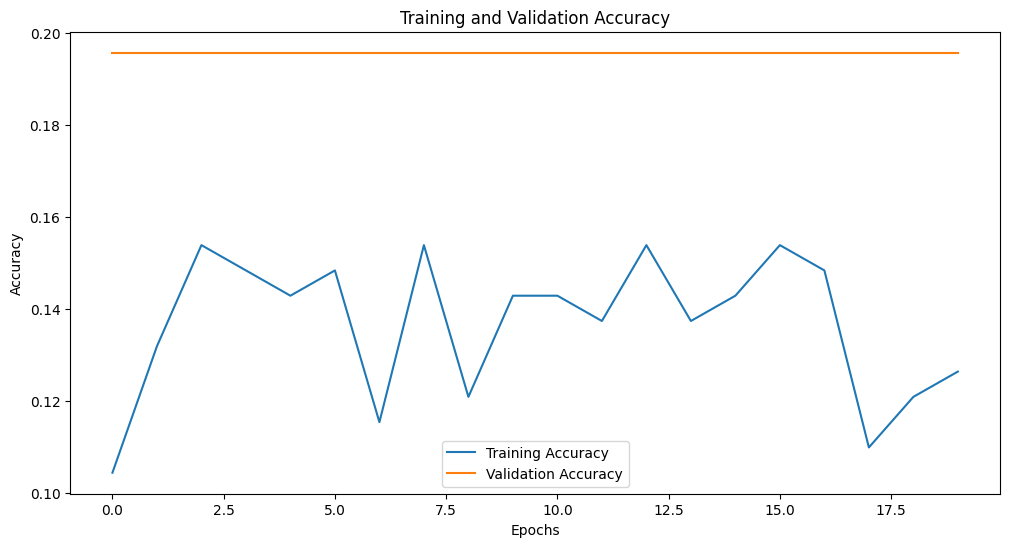

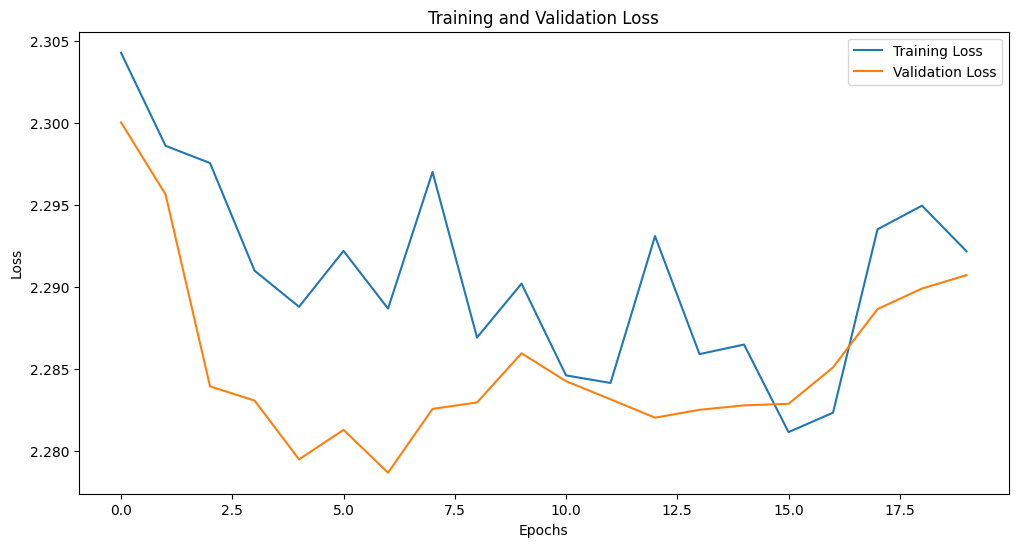

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()